# 3.6 Cluster Analysis

### This script contains the following:
### 1. Importing libraries and data and renaming columns
### 2. The elbow technique
### 3. k-means clustering

### 1. Importing libraries and data and renaming columns

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [237]:
%matplotlib inline

In [241]:
path = r"C:\Users\dsadl\OneDrive\Documents\Career Foundry\Data Immersion\Project 6"

In [242]:
df = pd.read_csv(os.path.join(path, 'Food Environment Analysis', '02 Data', 'Prepared Data','merged_data_imputed.csv'))

In [243]:
df.shape

(3143, 34)

In [244]:
df.head()

,FIPS,State,County,laccess,pct_laccess,lowinc_laccess,pct_lowinc_laccess,snap_laccess,pct_snap_laccess,child_laccess,...,pct_pacific_laccess,multi_laccess,pct_multi_laccess,pct_snap,pct_snap_participation,pct_adult_diabetes,pct_adult_obese,pct_food_insec,pct_vlow_foodsecure,med_income
0,1001,AL,Autauga,17496.693040,32.062255,6543.676824,11.991125,931.935186,4.608749,4616.971480,...,0.016159,482.848633,0.884808,16.500056,86.898,13.0,36.3,16.3,7.1,56580.0
1,1003,AL,Baldwin,30561.264430,16.767489,9886.831137,5.424427,950.535290,1.298900,7007.972675,...,0.008131,1127.696098,0.618712,16.500056,86.898,10.4,36.3,16.3,7.1,52387.0
2,1005,AL,Barbour,6069.523628,22.105560,2948.790251,10.739667,422.569040,4.303147,1031.927776,...,0.029436,462.382655,1.684025,16.500056,86.898,18.4,36.3,16.3,7.1,31433.0
3,1007,AL,Bibb,969.378841,4.230324,596.162829,2.601627,53.818772,0.676710,232.642670,...,0.000000,5.259244,0.022951,16.500056,86.898,14.8,36.3,16.3,7.1,40767.0
4,1009,AL,Blount,3724.428242,6.497380,1650.959482,2.880150,175.370338,0.812727,910.686113,...,0.001854,202.914186,0.353990,16.500056,86.898,14.1,36.3,16.3,7.1,50487.0


In [245]:
df.dtypes

FIPS                        int64
State                      object
County                     object
laccess                   float64
pct_laccess               float64
lowinc_laccess            float64
pct_lowinc_laccess        float64
snap_laccess              float64
pct_snap_laccess          float64
child_laccess             float64
pct_child_laccess         float64
senior_laccess            float64
pct_senior_laccess        float64
white_laccess             float64
pct_white_laccess         float64
black_laccess             float64
pct_black_laccess         float64
hisp_laccess              float64
pct_hisp_laccess          float64
asian_laccess             float64
pct_asian_laccess         float64
natamer_laccess           float64
pct_natamer_laccess       float64
pacific_laccess           float64
pct_pacific_laccess       float64
multi_laccess             float64
pct_multi_laccess         float64
pct_snap                  float64
pct_snap_participation    float64
pct_adult_diab

In [246]:
df['FIPS'] = df['FIPS'].astype('str')

In [247]:
df['FIPS'].dtype

dtype('O')

In [248]:
# Creating a subset of the numerical values
sub = df[['pct_laccess','pct_lowinc_laccess','pct_child_laccess','pct_senior_laccess','pct_white_laccess','pct_black_laccess','pct_hisp_laccess','pct_asian_laccess','pct_natamer_laccess','pct_pacific_laccess','pct_multi_laccess','pct_adult_diabetes']]

In [249]:
sub.head()

,pct_laccess,pct_lowinc_laccess,pct_child_laccess,pct_senior_laccess,pct_white_laccess,pct_black_laccess,pct_hisp_laccess,pct_asian_laccess,pct_natamer_laccess,pct_pacific_laccess,pct_multi_laccess,pct_adult_diabetes
0,32.062255,11.991125,8.460485,3.996279,23.163613,7.726582,0.863345,0.159000,0.112092,0.016159,0.884808,13.0
1,16.767489,5.424427,3.844936,3.061840,13.981393,1.942757,0.755973,0.116833,0.099662,0.008131,0.618712,10.4
2,22.105560,10.739667,3.758341,3.001695,10.302934,9.881360,1.855183,0.062266,0.145539,0.029436,1.684025,18.4
3,4.230324,2.601627,1.015242,0.600865,2.358770,1.828933,0.037516,0.008703,0.010967,0.000000,0.022951,14.8
4,6.497380,2.880150,1.588720,0.882583,5.909147,0.167201,0.867886,0.014705,0.050484,0.001854,0.353990,14.1


In [250]:
sub.dtypes

pct_laccess            float64
pct_lowinc_laccess     float64
pct_child_laccess      float64
pct_senior_laccess     float64
pct_white_laccess      float64
pct_black_laccess      float64
pct_hisp_laccess       float64
pct_asian_laccess      float64
pct_natamer_laccess    float64
pct_pacific_laccess    float64
pct_multi_laccess      float64
pct_adult_diabetes     float64
dtype: object

### 2. The elbow technique to determine the range of potential clusters

In [251]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [252]:
# Create a score of the variation for the clusters

score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\clust

[-2733095.243329582,
 -1223691.5336966487,
 -697643.0462762526,
 -540303.5410719604,
 -447533.99388933205,
 -379926.5574132182,
 -342293.12971218117,
 -309696.3394194327,
 -285872.91966590675]

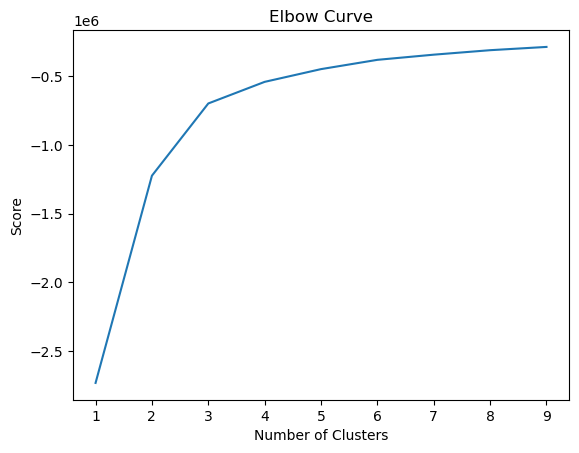

In [253]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Conclusion:
There's a large jump from 2 to 3 in Number of Clusters, but the curve straightens out following that jump. Therefore, I selected 3 clusters as the optimal number for this data.

### 3. k-means clustering

In [254]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)


In [255]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [256]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\dsadl\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dsadl\AppData\Local\Temp\ipykernel_6192\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [257]:
sub.head()

,pct_laccess,pct_lowinc_laccess,pct_child_laccess,pct_senior_laccess,pct_white_laccess,pct_black_laccess,pct_hisp_laccess,pct_asian_laccess,pct_natamer_laccess,pct_pacific_laccess,pct_multi_laccess,pct_adult_diabetes,clusters
0,32.062255,11.991125,8.460485,3.996279,23.163613,7.726582,0.863345,0.159000,0.112092,0.016159,0.884808,13.0,1
1,16.767489,5.424427,3.844936,3.061840,13.981393,1.942757,0.755973,0.116833,0.099662,0.008131,0.618712,10.4,0
2,22.105560,10.739667,3.758341,3.001695,10.302934,9.881360,1.855183,0.062266,0.145539,0.029436,1.684025,18.4,0
3,4.230324,2.601627,1.015242,0.600865,2.358770,1.828933,0.037516,0.008703,0.010967,0.000000,0.022951,14.8,0
4,6.497380,2.880150,1.588720,0.882583,5.909147,0.167201,0.867886,0.014705,0.050484,0.001854,0.353990,14.1,0


In [258]:
sub['clusters'].value_counts()

0    1899
1    1101
2     143
Name: clusters, dtype: int64

In [259]:
df_merged = df.merge(sub, on =['pct_laccess','pct_lowinc_laccess','pct_child_laccess','pct_senior_laccess','pct_white_laccess','pct_black_laccess','pct_hisp_laccess','pct_asian_laccess','pct_natamer_laccess','pct_pacific_laccess','pct_multi_laccess','pct_adult_diabetes'])

In [260]:
df_merged.head()

,FIPS,State,County,laccess,pct_laccess,lowinc_laccess,pct_lowinc_laccess,snap_laccess,pct_snap_laccess,child_laccess,...,multi_laccess,pct_multi_laccess,pct_snap,pct_snap_participation,pct_adult_diabetes,pct_adult_obese,pct_food_insec,pct_vlow_foodsecure,med_income,clusters
0,1001,AL,Autauga,17496.693040,32.062255,6543.676824,11.991125,931.935186,4.608749,4616.971480,...,482.848633,0.884808,16.500056,86.898,13.0,36.3,16.3,7.1,56580.0,1
1,1003,AL,Baldwin,30561.264430,16.767489,9886.831137,5.424427,950.535290,1.298900,7007.972675,...,1127.696098,0.618712,16.500056,86.898,10.4,36.3,16.3,7.1,52387.0,0
2,1005,AL,Barbour,6069.523628,22.105560,2948.790251,10.739667,422.569040,4.303147,1031.927776,...,462.382655,1.684025,16.500056,86.898,18.4,36.3,16.3,7.1,31433.0,0
3,1007,AL,Bibb,969.378841,4.230324,596.162829,2.601627,53.818772,0.676710,232.642670,...,5.259244,0.022951,16.500056,86.898,14.8,36.3,16.3,7.1,40767.0,0
4,1009,AL,Blount,3724.428242,6.497380,1650.959482,2.880150,175.370338,0.812727,910.686113,...,202.914186,0.353990,16.500056,86.898,14.1,36.3,16.3,7.1,50487.0,0


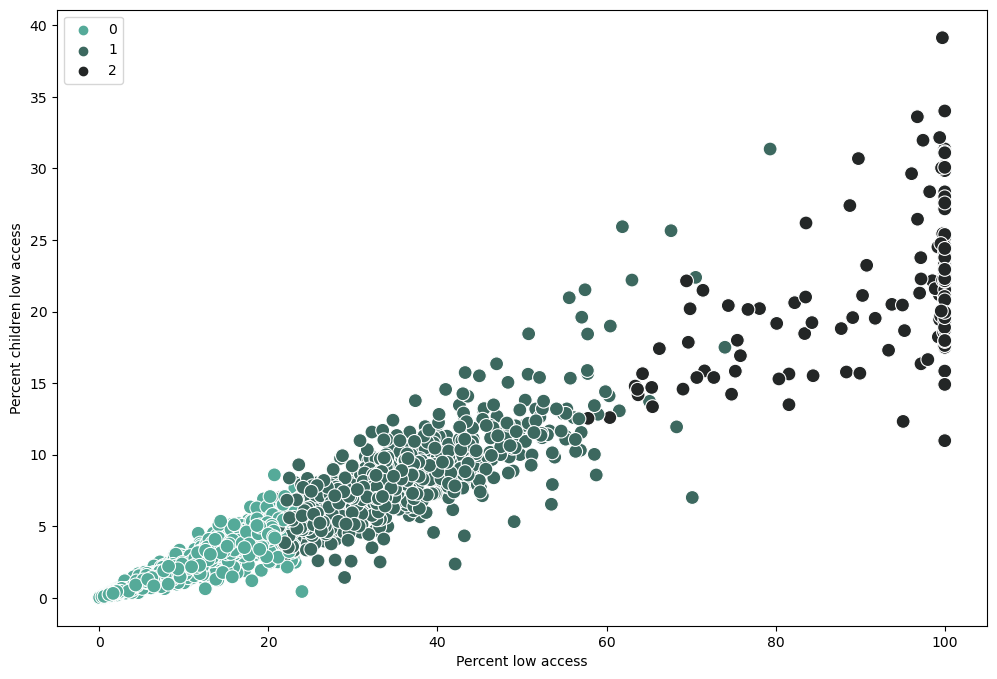

In [261]:
# Plot the clusters for the "Percent low access" and "Percent child low access" variables.

plt.figure(figsize=(12,8))

ax = sns.scatterplot(x=sub['pct_laccess'], y=sub['pct_child_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r',s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent children low access') # Label y-axis.
plt.show()

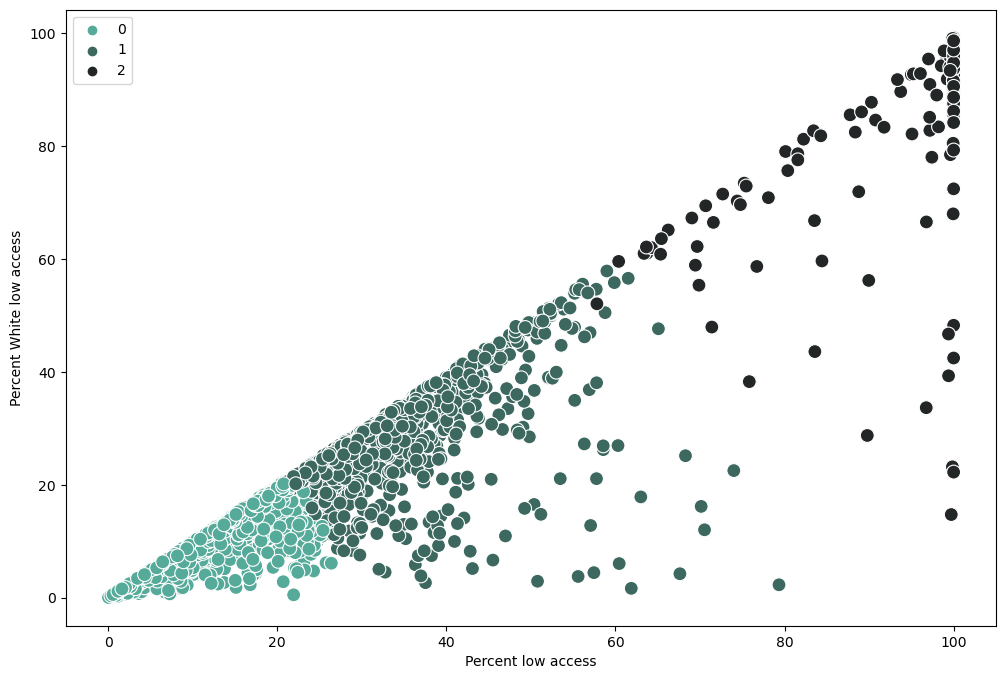

In [262]:
# Plot the clusters for the "Percent low access" and "Percent white low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_white_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent White low access') # Label y-axis.
plt.show()

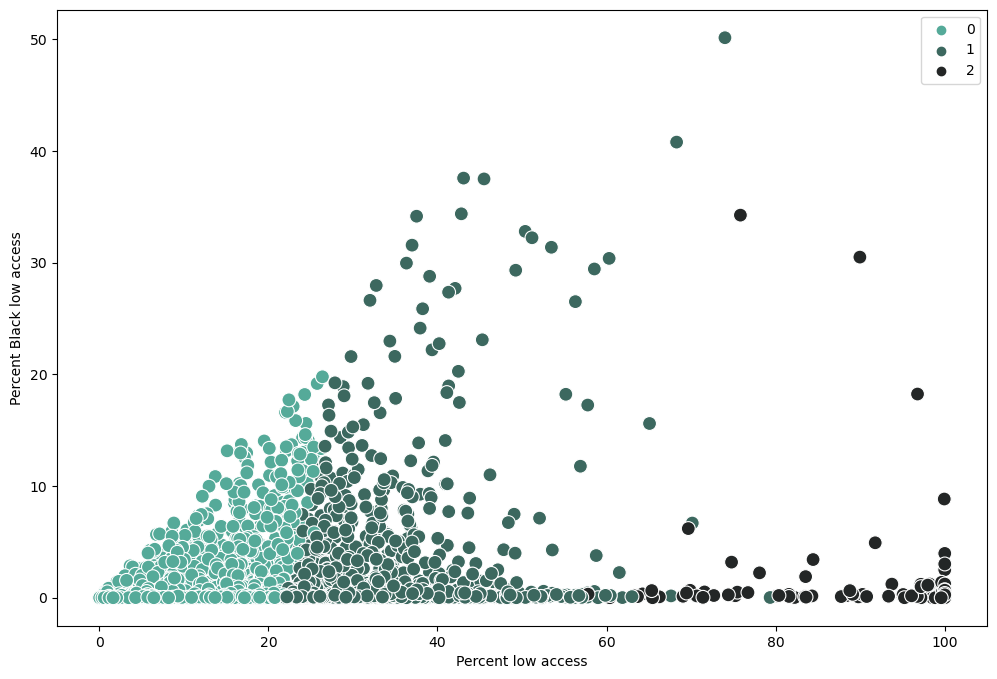

In [263]:
# Plot the clusters for the "Percent low access" and "Percent black low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_black_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent Black low access') # Label y-axis.
plt.show()

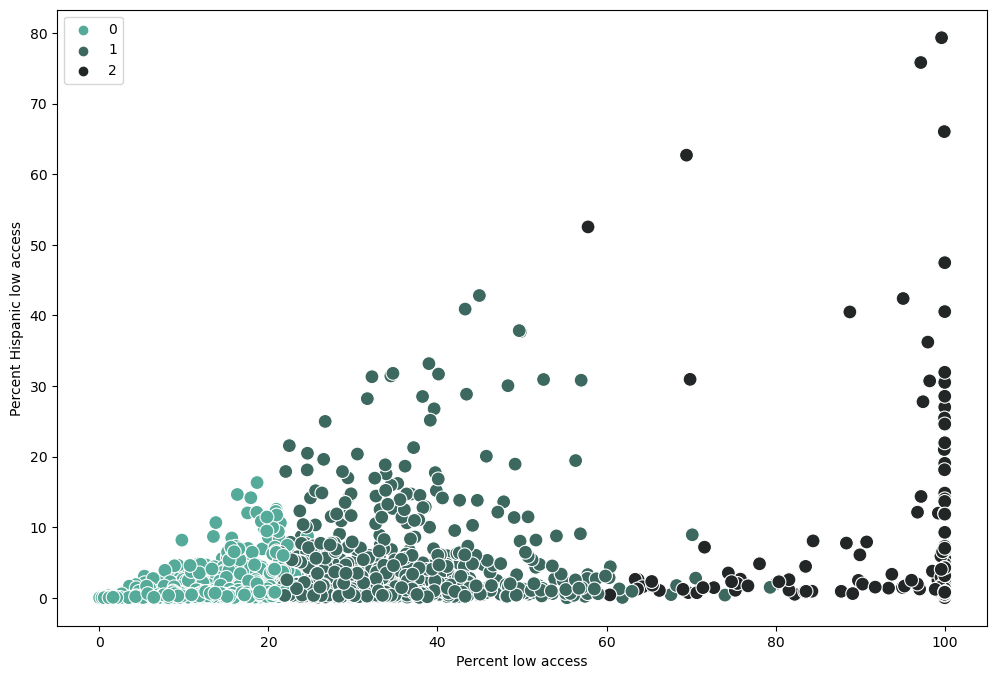

In [264]:
# Plot the clusters for the "Percent low access" and "Percent Hispanic low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_hisp_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent Hispanic low access') # Label y-axis.
plt.show()

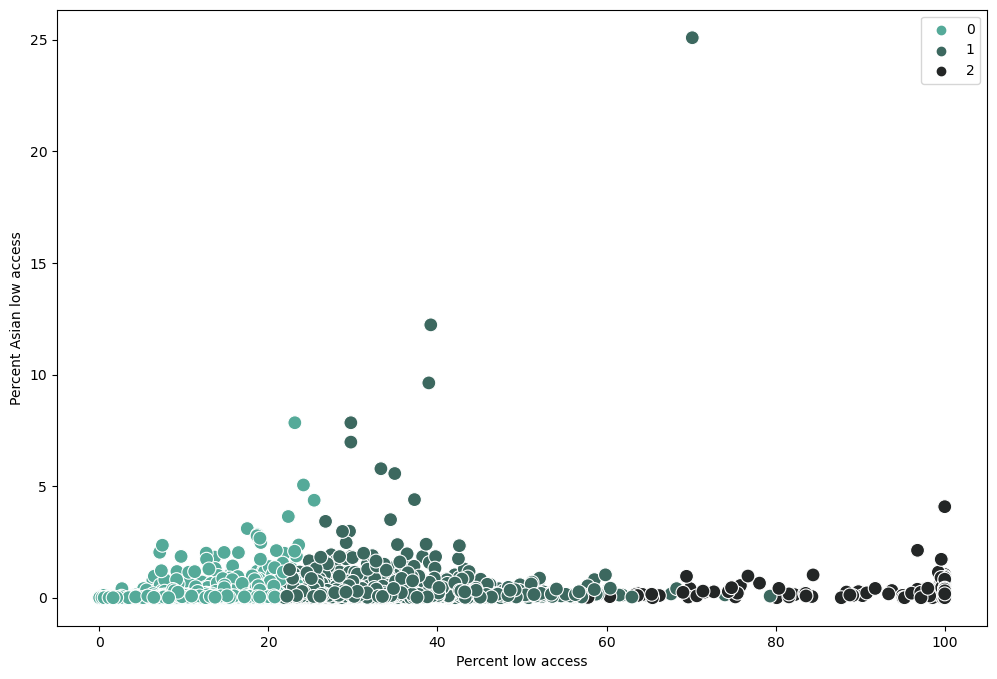

In [265]:
# Plot the clusters for the "Percent low access" and "Percent Asian low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_asian_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent Asian low access') # Label y-axis.
plt.show()

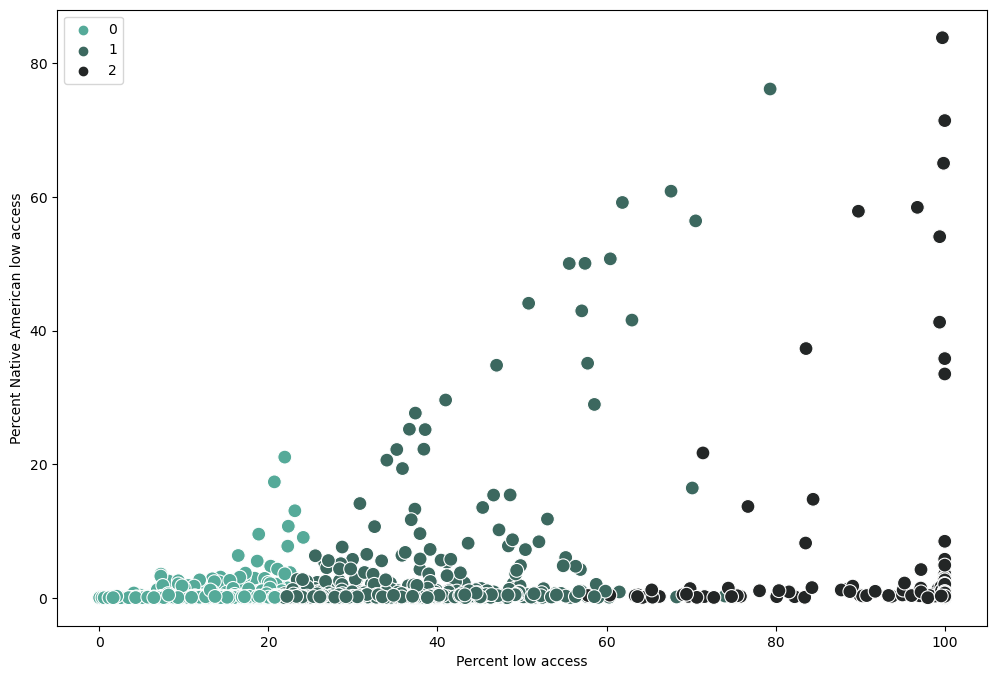

In [266]:
# Plot the clusters for the "Percent low access" and "Percent Native American low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_natamer_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent Native American low access') # Label y-axis.
plt.show()

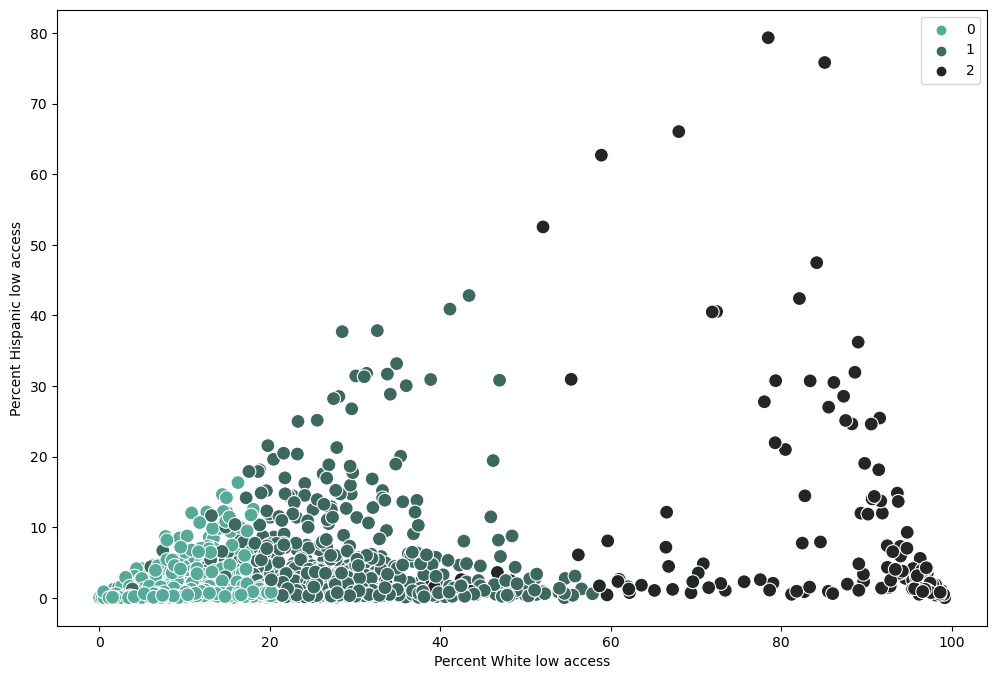

In [267]:
# Plot the clusters for the "Percent White low access" and "Percent Hispanic low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_white_laccess'], y=df['pct_hisp_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent White low access') # Label x-axis.
plt.ylabel('Percent Hispanic low access') # Label y-axis.
plt.show()

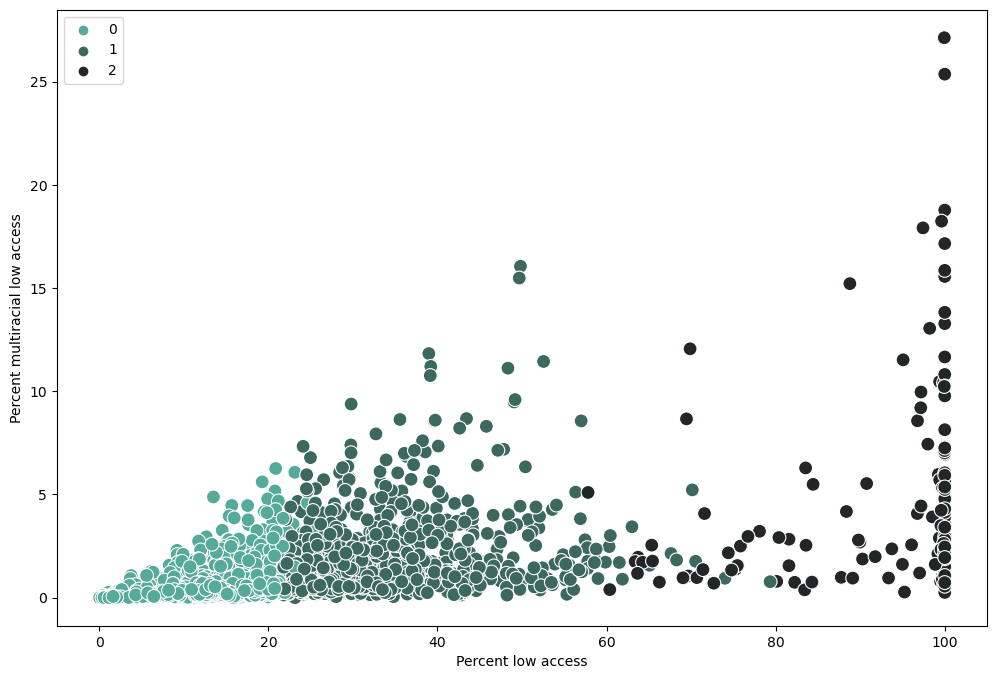

In [268]:
# Plot the clusters for the "Percent low access" and "Percent multiracial low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_multi_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent multiracial low access') # Label y-axis.
plt.show()

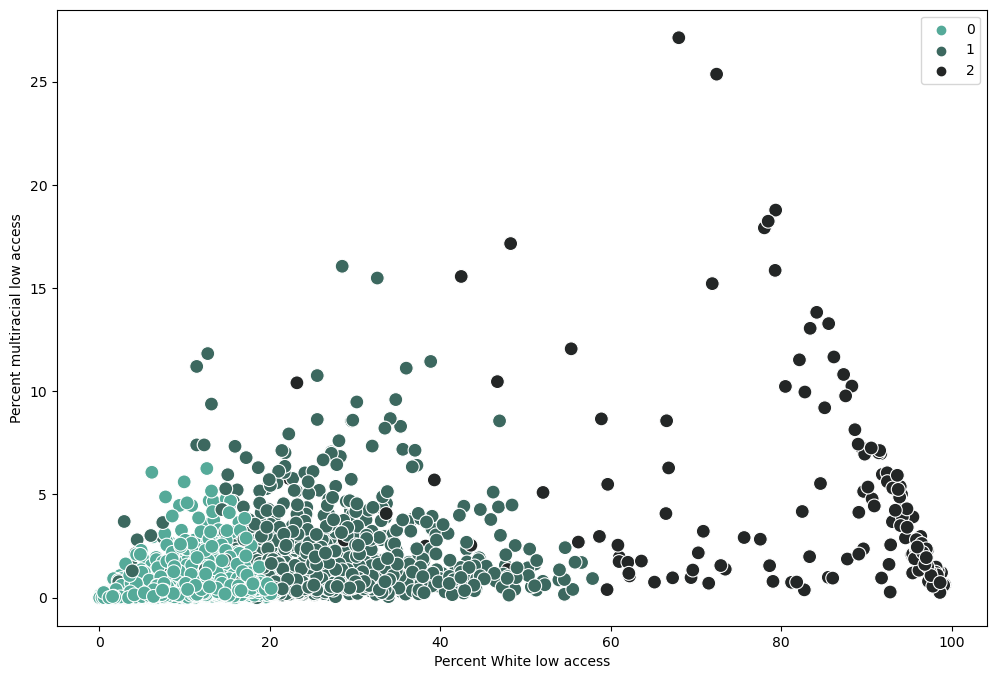

In [269]:
# Plot the clusters for the "Percent White low access" and "Percent multiracial low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_white_laccess'], y=df['pct_multi_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent White low access') # Label x-axis.
plt.ylabel('Percent multiracial low access') # Label y-axis.
plt.show()

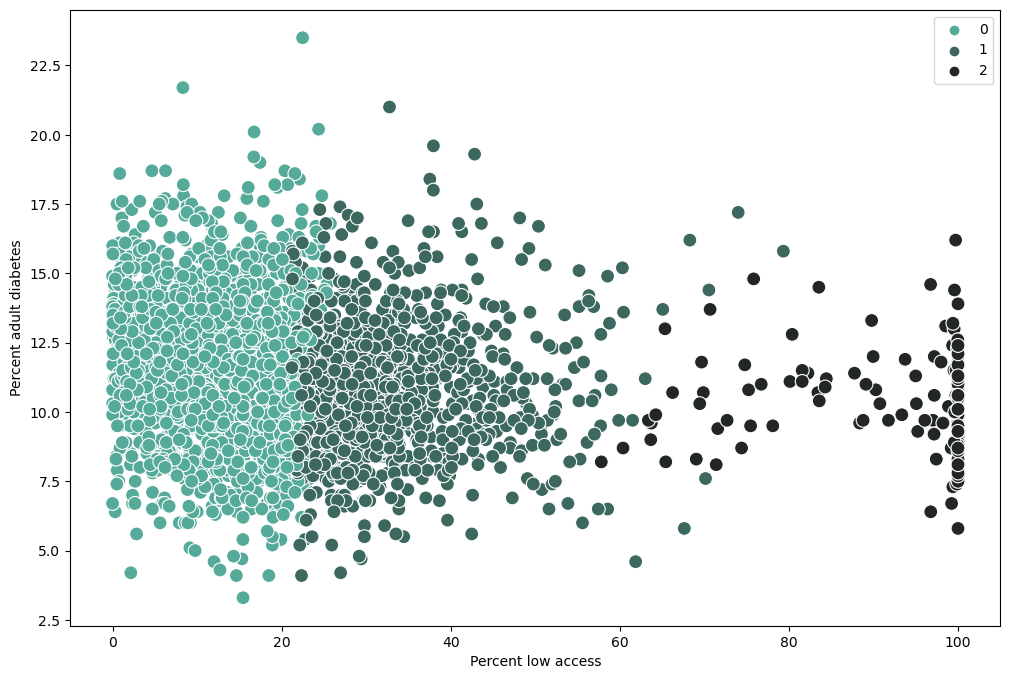

In [270]:
# Plot the clusters for the "Percent low access" and "Percent adult diabetes" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_adult_diabetes'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent adult diabetes') # Label y-axis.
plt.show()

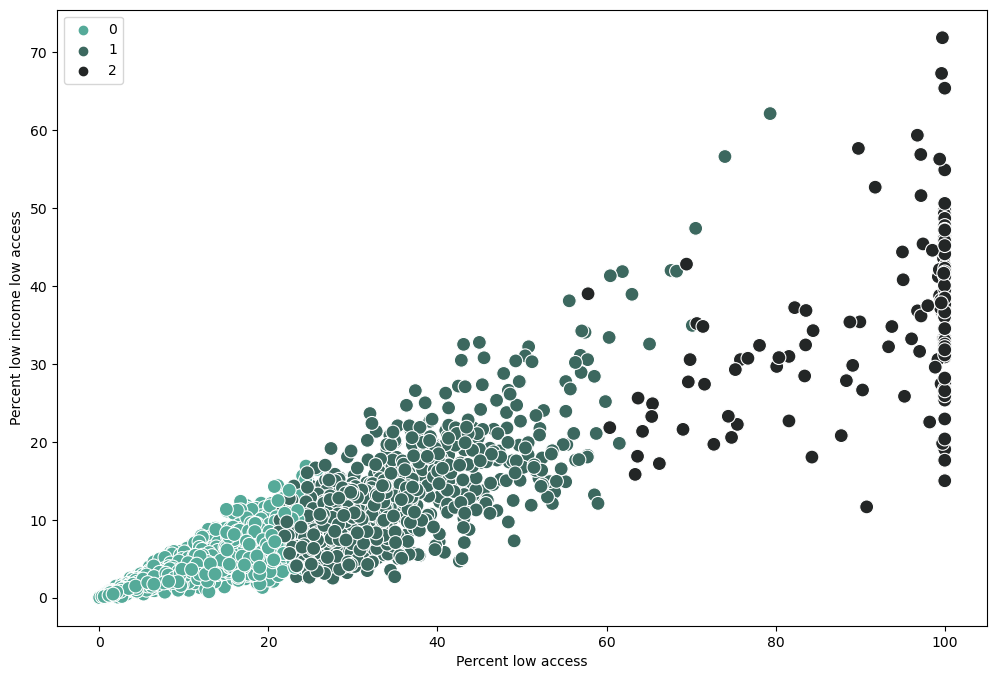

In [285]:
# Plot the clusters for the "Percent low access" and "Percent low income low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_laccess'], y=df['pct_lowinc_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent low access') # Label x-axis.
plt.ylabel('Percent low income low access') # Label y-axis.
plt.show()

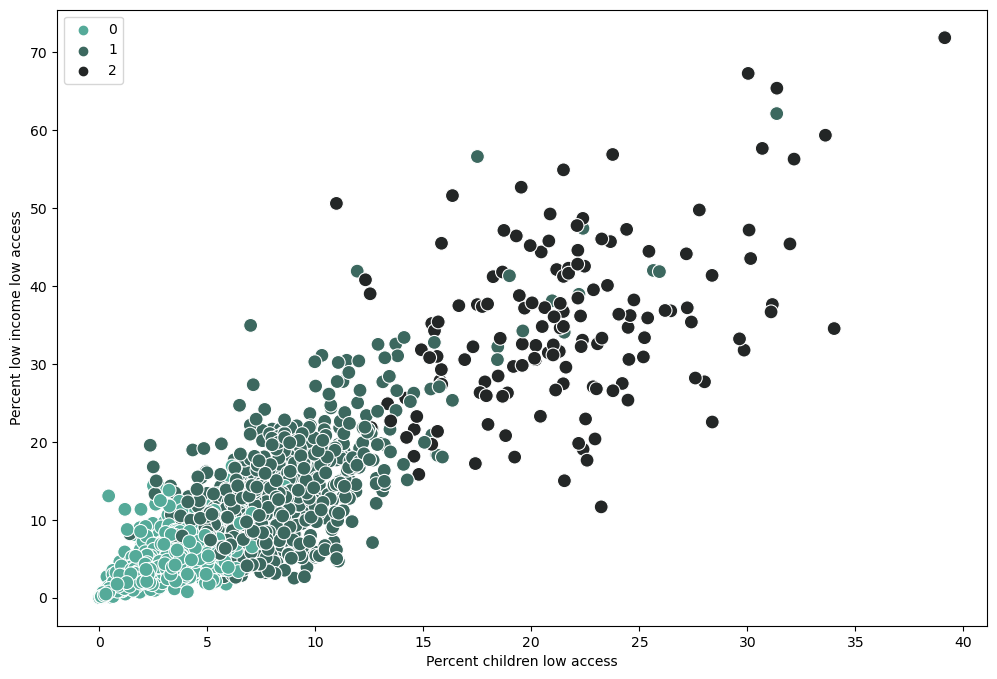

In [286]:
# Plot the clusters for the "Percent children low access" and "Percent low income low access" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['pct_child_laccess'], y=df['pct_lowinc_laccess'], hue=kmeans.labels_, palette='dark:#5A9_r', s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Percent children low access') # Label x-axis.
plt.ylabel('Percent low income low access') # Label y-axis.
plt.show()

#### Discussion: 
* The relationship is very strong between percent low access and percent White low access, and weaker/ non-existant  among all other ethnic groups and percent low access.
* There is a slight relationship (with high variability) between percentage of White and percentage of Hispanic people with low access. 
* There isn't a relationship between percentages of White and multiracial people with low access.The graph showing the clusters of people by percentage of low access and percentage of rates of adult diabetes is interesting in that the percentage of diabetes was within the same range regardless of the rate of low access to food in an area. 
* The scatterplots showing the percent low income and percent children demonstrated the earlier exploratory analysis: a strong correlation until about 50% that gets weaker at higher levels of low access. 
* There is a strong relationship between percentages of seniors and children with low access, and similarly, a strong relationship between percent low income/ low access and children with low access.

All of these relationships make sense in the context of earlier exploratory analysis done on these variables.

In [43]:
print(sns.color_palette("dark6").as_hex())

['#001c7f', '#12711c', '#8c0800', '#591e71', '#b8850a', '#006374']


In [273]:
# Calculate descriptive statistics for the clusters

df_merged.loc[df_merged['clusters'] == 2, 'cluster'] = 'dark teal'
df_merged.loc[df_merged['clusters'] == 1, 'cluster'] = 'teal'
df_merged.loc[df_merged['clusters'] == 0, 'cluster'] = 'light teal'

In [274]:
# descriptive statistics included for the three highest ethnic population groups in the data

df_merged.groupby('cluster').agg({'pct_laccess':['mean', 'median'], 
                         'pct_child_laccess':['mean', 'median'], 
                         'pct_senior_laccess':['mean', 'median'],
                          'pct_lowinc_laccess':['mean', 'median'],
                          'pct_white_laccess':['mean', 'median'],
                          'pct_hisp_laccess':['mean', 'median'],
                          'pct_multi_laccess':['mean', 'median']})

pct_laccess            pct_child_laccess             \
                  mean     median              mean     median   
cluster                                                          
dark teal    92.525803  99.721690         21.531997  21.337266   
light teal   12.316033  12.724217          2.856924   2.877789   
teal         32.641479  30.150975          7.710387   7.189361   

           pct_senior_laccess            pct_lowinc_laccess             \
                         mean     median               mean     median   
cluster                                                                  
dark teal           17.848125  18.358238          34.995554  34.612770   
light teal           1.938426   1.892630           4.628374   4.325629   
teal                 5.151043   4.625292          12.148883  10.890506   

           pct_white_laccess            pct_hisp_laccess            \
                        mean     median             mean    median   
cluster                                                              
dark teal          81.265664  89.084507         9.589313  2.631843   
light teal          9.975885  10.230829         0.849821  0.303120   
teal               26.381794  25.162746         3.044518  1.248103   

           pct_multi_laccess            
                        mean    median  
cluster                                 
dark teal           4.775337  2.813653  
light teal          0.561324  0.310518  
teal                1.704556  1.107916

#### Future data pipeline recommendations

One of the key pieces of data that is missing in exploring segments of the population is the total number of people in a county by ethnicity. That would allow me to examine whether certain ethic groups experience low food access differently than others, because all the groups of people of color have low representation in overall totals. I would recommend including that data going forward. I would also include the binary variable indicating whether a county is a metro area in future datasets used for clustering.

In [276]:
df_merged.to_csv(os.path.join(path, 'Food Environment Analysis','02 Data','Prepared Data', 'clusters.csv'))